![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

12
Central
0-17      3624
18-25    24366
26-34    47288
35-44    43759
45-54    29247
55-64    21116
65+      16315
Name: AGES, dtype: int64


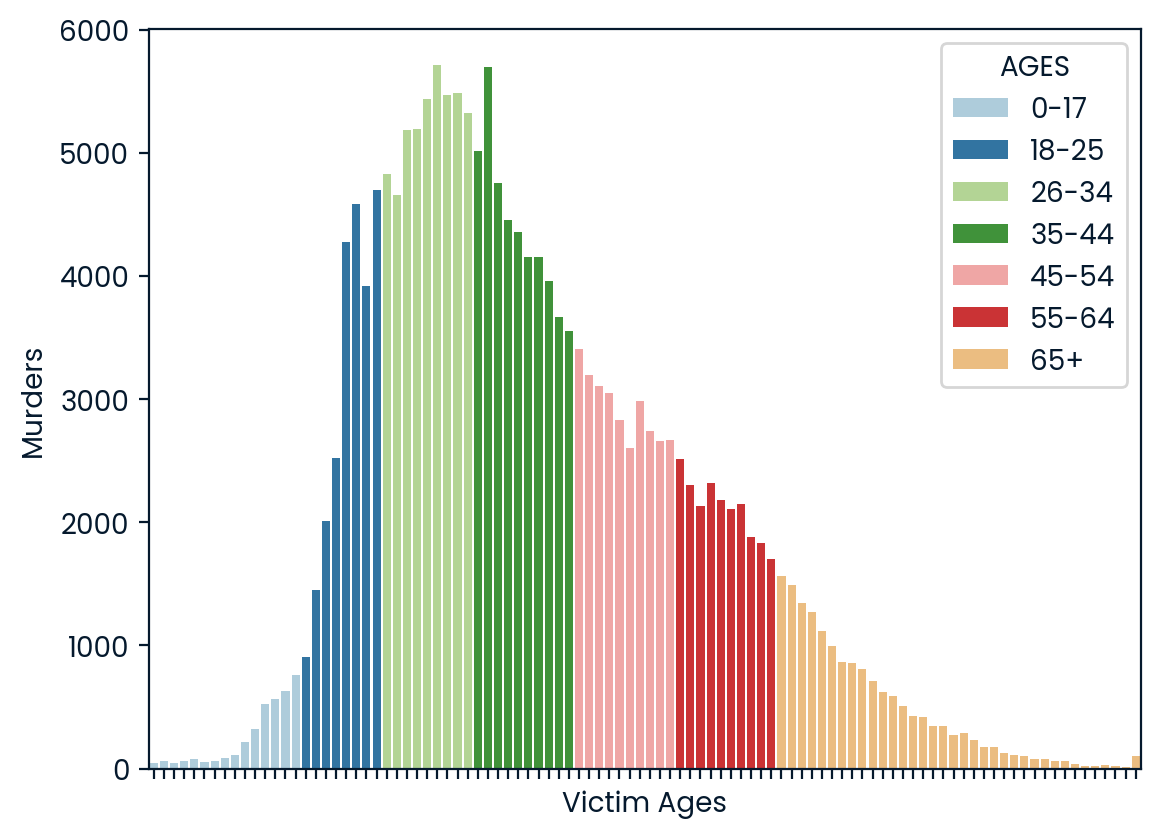

       DR_NO  Date Rptd   DATE OCC  ... HOUR NIGHT_TIMES   AGES
0  220314085 2022-07-22 2020-05-12  ...   11       False  26-34
1  222013040 2022-08-06 2020-06-04  ...   16       False  55-64
2  220614831 2022-08-18 2020-08-17  ...   12       False  26-34
3  231207725 2023-02-27 2020-01-27  ...    6       False  35-44
4  220213256 2022-07-14 2020-07-14  ...    9       False    65+

[5 rows x 15 columns]


In [78]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the required csv data file
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

# Hour that has the highest frequency of crimes?
crimes["HOUR"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes["HOUR"].value_counts().idxmax()
print(peak_crime_hour)

# Area that has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)
night_time = [22, 23, 0, 1, 2, 3]
crimes["NIGHT_TIMES"] = crimes["HOUR"].isin(night_time)
night_crimes = crimes[crimes["NIGHT_TIMES"]]
peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
print(peak_night_crime_location)

# The number of crimes committed against victims of different age groups.
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
age_bins = [0, 17, 25, 34, 44, 54, 64, 100]
crimes["AGES"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels, right=False)
victim_ages = crimes["AGES"].value_counts().sort_index()
print(victim_ages)

# Plotting the victim age - crime 
sns.color_palette("flare", as_cmap=True)
sns.countplot(x="Vict Age", data=crimes, hue="AGES")
plt.xlabel("Victim Ages")
plt.ylabel("Murders")
plt.xticks(visible=False)
plt.show()

# Retrieving the first 5 rows of the dataset
print(crimes.head())

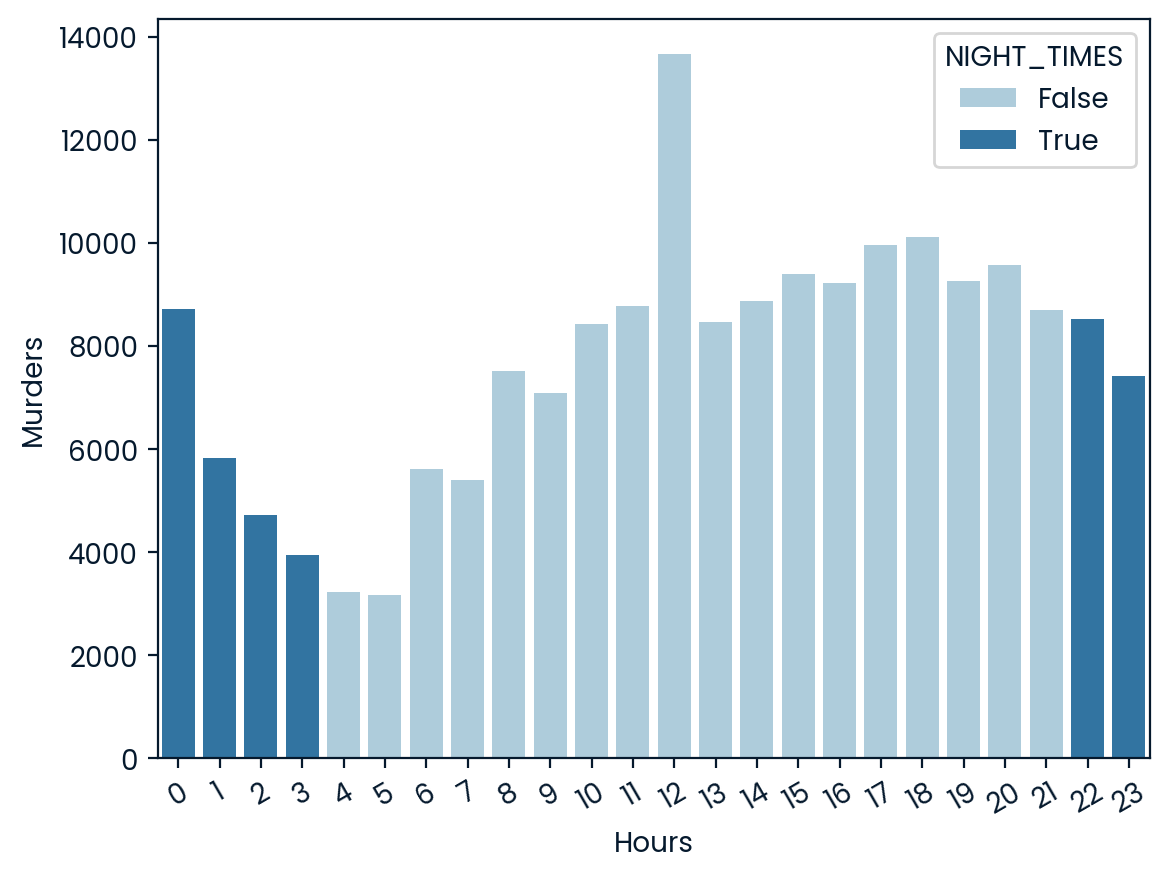

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Paired")

# Plotting the victim hours - crime data
sns.countplot(x="HOUR", data=crimes, hue="NIGHT_TIMES")
plt.xlabel("Hours")
plt.ylabel("Murders")
plt.xticks(rotation=30)
plt.show()